In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline 

### Data exploration

We load the data from a csv file. The data is a DataFrame.

In [6]:
data = pd.read_csv('diabetes.csv')

In [7]:
type(data)

pandas.core.frame.DataFrame

Explore the data: columns, shape, basic statistics, missing values

In [8]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
data.shape

(768, 9)

In [10]:
data.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

In [11]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Data curation

In [15]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

The data doesn't contain missing values, which is a very good news. (We have seen in the previous session "DataFrame- Basics" how to deal with missing values). 

However, we must check wether some data are incomplete. For instance some features are 0 eventhough they shouldn't in the real world.

Example, blood pressure for a normal person cannot be 0.

In [16]:
data[data.BloodPressure == 0].count()

Pregnancies                 35
Glucose                     35
BloodPressure               35
SkinThickness               35
Insulin                     35
BMI                         35
DiabetesPedigreeFunction    35
Age                         35
Outcome                     35
dtype: int64

In [17]:
data[data.Glucose == 0].count()

Pregnancies                 5
Glucose                     5
BloodPressure               5
SkinThickness               5
Insulin                     5
BMI                         5
DiabetesPedigreeFunction    5
Age                         5
Outcome                     5
dtype: int64

In [18]:
data[data.SkinThickness == 0].count()

Pregnancies                 227
Glucose                     227
BloodPressure               227
SkinThickness               227
Insulin                     227
BMI                         227
DiabetesPedigreeFunction    227
Age                         227
Outcome                     227
dtype: int64

In [19]:
data[data.BMI == 0].count()

Pregnancies                 11
Glucose                     11
BloodPressure               11
SkinThickness               11
Insulin                     11
BMI                         11
DiabetesPedigreeFunction    11
Age                         11
Outcome                     11
dtype: int64

In [20]:
data[data.Age == 0].count()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [21]:
data[data.Insulin == 0].count()

Pregnancies                 374
Glucose                     374
BloodPressure               374
SkinThickness               374
Insulin                     374
BMI                         374
DiabetesPedigreeFunction    374
Age                         374
Outcome                     374
dtype: int64

How should we proceed for the unrealistic 0 values?

1. Ignore/remove the rows with 0 : In the case of “skin thickness” and “insulin”, we remove plenty of data and loose valuable information. But it might work for “BMI”, “glucose ”and “blood pressure” data points.

2. Add average/mean values : This might work for some data sets, but we need to check  whether putting a mean value to the blood pressure column, for instance, would send a wrong signal to the model.

3. Remove features : It is possible to not use the features with a lot of invalid values for the model. This may work for “skin thickness” or "insulin" but its hard to predict that.

We will combine stategies 1. and 3.

For the columns/features BMI, glucose and Blood pressure, we remove rows with with 0 values.

We ignore the features skin thickness and insulin because they are invalid.

Since this is a demonstration for data exploration, we will proceed with the above strategies but it may not be ideal.

In [22]:
data_clean = data[(data.BloodPressure != 0) & (data.BMI != 0) & (data.Glucose != 0)].drop(['SkinThickness', 'Insulin'],axis=1)

In [23]:
data_clean.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [24]:
data_clean[data_clean.BloodPressure == 0].count()

Pregnancies                 0
Glucose                     0
BloodPressure               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [25]:
data_clean[data_clean.Glucose == 0].count()

Pregnancies                 0
Glucose                     0
BloodPressure               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [26]:
data_clean[data_clean.BMI == 0].count()

Pregnancies                 0
Glucose                     0
BloodPressure               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [28]:
data_clean[data_clean.BloodPressure < 0].count()

Pregnancies                 0
Glucose                     0
BloodPressure               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [30]:
data_clean.shape

(724, 7)

In [31]:
data.shape

(768, 9)

In [35]:
type(age)

pandas.core.series.Series

### Data visualization

Next, we visualize data. We use matplotlib.pyplot.

In [36]:
age = data_clean.groupby('Age').count().Outcome

<BarContainer object of 51 artists>

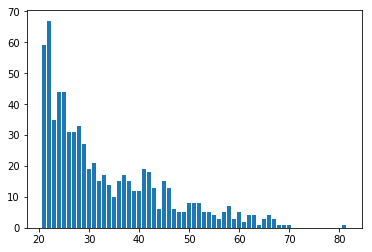

In [44]:
plt.bar(age.index,age)

In [45]:
bmi = data_clean.groupby('BMI').count().Outcome
blood = data_clean.groupby('BloodPressure').count().Outcome
glucose = data_clean.groupby('Glucose').count().Outcome
preg = data_clean.groupby('Pregnancies').count().Outcome

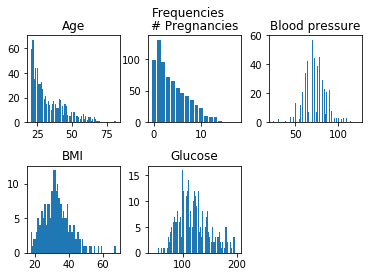

In [46]:
plt.figure()
plt.suptitle('Frequencies')
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)

subfig1 = plt.subplot(231)
subfig1.set_title("Age")
subfig1.bar(age.index, age)

subfig2 = plt.subplot(232)
subfig2.set_title("# Pregnancies")
subfig2.bar(preg.index, preg)

subfig3 = plt.subplot(233)
subfig3.set_title("Blood pressure")
subfig3.bar(blood.index, blood)

subfig4 = plt.subplot(234)
subfig4.set_title("BMI")
subfig4.bar(bmi.index, bmi)

subfig5 = plt.subplot(235)
subfig5.set_title("Glucose")
subfig5.bar(glucose.index, glucose)

plt.show()

In [47]:
x0 = data_clean.Glucose[data_clean.Outcome == 0]
y0 = data_clean.BloodPressure[data_clean.Outcome == 0]

In [48]:
x1 = data_clean.Glucose[data_clean.Outcome == 1]
y1 = data_clean.BloodPressure[data_clean.Outcome == 1]

Text(0,0.5,'BloodPressure')

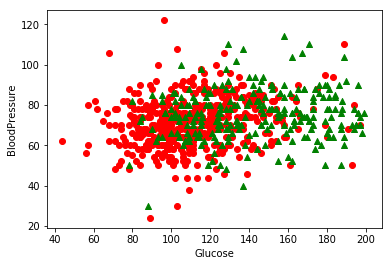

In [49]:
plt.scatter(x0, y0, c='r', marker='o')
plt.scatter(x1, y1, c='g', marker='^')
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')

In [50]:
x0 = data_clean.Age[data_clean.Outcome == 0]
y0 = data_clean.BloodPressure[data_clean.Outcome == 0]

In [51]:
x1 = data_clean.Age[data_clean.Outcome == 1]
y1 = data_clean.BloodPressure[data_clean.Outcome == 1]

Text(0,0.5,'BloodPressure')

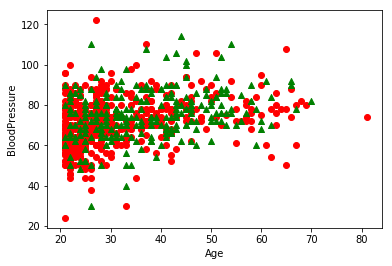

In [52]:
plt.scatter(x0, y0, c='r', marker='o')
plt.scatter(x1, y1, c='g', marker='^')
plt.xlabel('Age')
plt.ylabel('BloodPressure')

In [53]:
x0 = data_clean.Age[data_clean.Outcome == 0]
y0 = data_clean.Glucose[data_clean.Outcome == 0]

In [54]:
x1 = data_clean.Age[data_clean.Outcome == 1]
y1 = data_clean.Glucose[data_clean.Outcome == 1]

Text(0,0.5,'Glucose')

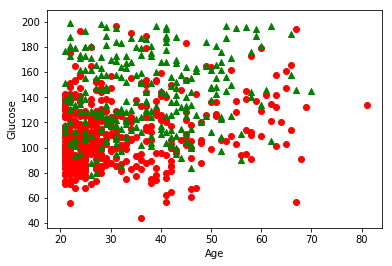

In [55]:
plt.scatter(x0, y0, c='r', marker='o')
plt.scatter(x1, y1, c='g', marker='^')
plt.xlabel('Age')
plt.ylabel('Glucose')

### Data split

In machine learning models, we split the data set into two portions : a training set and a testing set. The training set is used to train the model. And the testing set is used to test the model, and evaluate the accuracy.

<img src="data.png" width="200" height="100">

We use the library ``scikit-learn`` a lot! ``scikit-learn`` is open source and constantly being developped and improved.
- source code: https://github.com/scikit-learn/scikit-learn
- documentation: https://scikit-learn.org

``scikit-learn`` contains a number of state-of-the-art machine learning algorithms. 

``scikit-learn`` is loaded using the name ``sklearn``.

Below, we load function ``train_test_split`` of the class ``sklearn.model_selection``.

In [56]:
from sklearn.model_selection import train_test_split

We declare the **features** of our machine learning model and the **output** or the **target**.

In [57]:
X = data_clean[['Age','Pregnancies','Glucose','BloodPressure','BMI']]
y = data_clean.Outcome

We call ``train_test_split`` to split the data as shown in the figure above. Note that ``train_test_split`` works with DataFrame object. 

Other parameters:
- ``stratify=data_clean.Outcome`` means each outcome class should be represented with equal proportions. In our example, the two outcome classes, i.e. 0 and 1, have the same propositions in ``y_train`` and ``y_test``.
- ``random_state=0`` makes sure that we obtain the same datasets everytime we run ``train_test_split``.
- by default, the size of ``X_train`` and ``X_test`` are 75% and 25%, respectively. Use parameter ``test_size=0.33`` when working with ``X_test`` with size 33%, for instance.

Result:
- ``train_test_split`` returns two DataFrames ``X_train`` and ``X_test``, and two Series ``y_train`` and ``y_test``.

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = data_clean.Outcome, random_state=0)

In [59]:
X_train.shape

(543, 5)

In [60]:
type(X_train)

pandas.core.frame.DataFrame

In [61]:
X_test.shape

(181, 5)

In [62]:
y_train.shape

(543,)

In [63]:
type(y_train)

pandas.core.series.Series

In [64]:
y_test.shape

(181,)

### Introduction to machine learning models in scikit-learn 

Model selection phase is the most exciting and the heart of machine learning. It is the phase where we select the model which performs best for the data set at hand.

First we will be calculating the **accuracy (testing accuracy)** of a given set of machine learning models with their default parameters to determine which model performs better with the diabetes data set.

We will import the necessary libraries to the notebook. We import seven classifiers, namely **K-Nearest Neighbors**, **Support Vector Classifier**, **Logistic Regression**, **Gaussian Naive Bayes**, **Random Forest** and **Gradient Boost** to be contenders for the best classifier.

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score # metric to evaluate the accuracy of the model

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [66]:
models=[]
scores=[]

KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
scores.append(accuracy_score(y_test, y_pred))
models.append('KNN')

vector = SVC()
vector.fit(X_train, y_train)
y_pred = vector.predict(X_test)
scores.append(accuracy_score(y_test, y_pred))
models.append('SVC')

LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
scores.append(accuracy_score(y_test, y_pred))
models.append('LR')

DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
scores.append(accuracy_score(y_test, y_pred))
models.append('DT')

GNB = GaussianNB()
GNB.fit(X_train, y_train)
y_pred = GNB.predict(X_test)
scores.append(accuracy_score(y_test, y_pred))
models.append('GNB')

RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
scores.append(accuracy_score(y_test, y_pred))
models.append('RF')

GB = GradientBoostingClassifier()
GB.fit(X_train, y_train)
y_pred = GB.predict(X_test)
scores.append(accuracy_score(y_test, y_pred))
models.append('GB')

results = pd.DataFrame({'Model': models, 'Score': scores})

In [67]:
results

,Model,Score
0,KNN,0.779006
1,SVC,0.651934
2,LR,0.773481
3,DT,0.723757
4,GNB,0.784530
5,RF,0.756906
6,GB,0.762431


<BarContainer object of 7 artists>

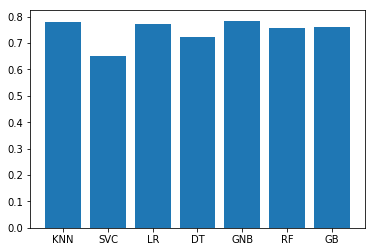

In [68]:
plt.bar(results.Model, results.Score)